In [2]:
import os
from glob import glob 

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data_paths = glob('../dataset/cifar/train/*.png')

In [12]:
os.listdir('../dataset/cifar/train/')[0] # 파일명만 가져옴

'0_frog.png'

In [9]:
path = data_paths[0]
path

'../dataset/cifar/train\\0_frog.png'

In [13]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

image.shape

TensorShape([32, 32, 3])

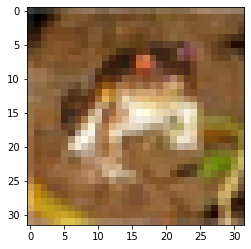

In [14]:
plt.imshow(image)
plt.show()

In [15]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

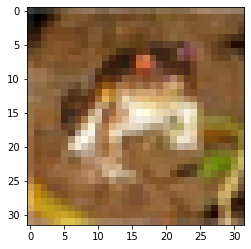

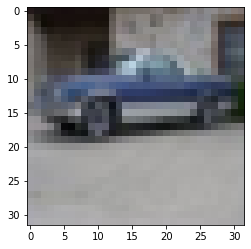

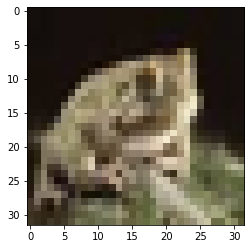

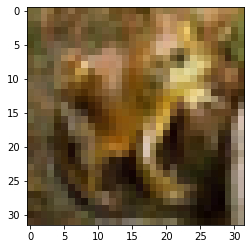

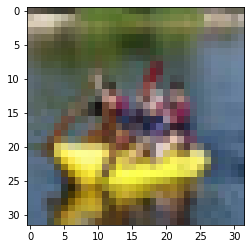

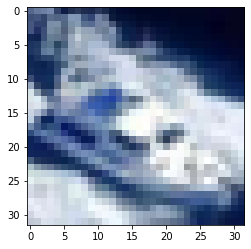

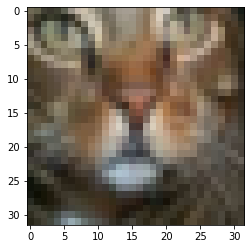

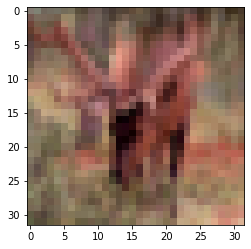

In [19]:
for i in range(8):
    plt.imshow(read_image(data_paths[i]))
    plt.show()

# Batch

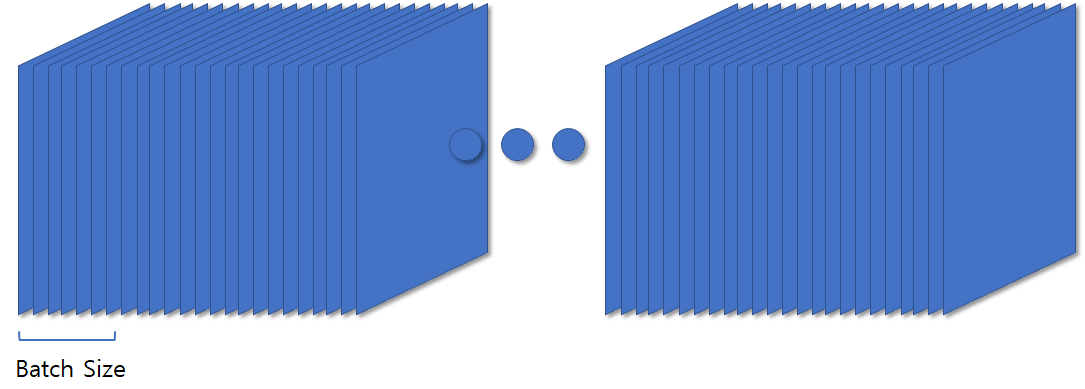

## Images in List

In [20]:
batch_images = []

In [22]:
for path in data_paths[:8]:
    image = read_image(path)
    # image = cv2.resize(image, (32, 32))
    batch_images.append(image)

In [24]:
image.shape

TensorShape([32, 32, 3])

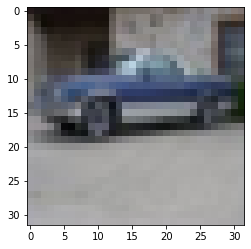

In [23]:
plt.imshow(batch_images[1])
plt.show()

In [27]:
np.array(batch_images).shape # 이미지 크기가 같아야 묶여짐

(8, 32, 32, 3)

In [28]:
batch = tf.convert_to_tensor(batch_images)

In [29]:
batch.shape # 모양이 맞지않다면 8만 나옴

TensorShape([8, 32, 32, 3])

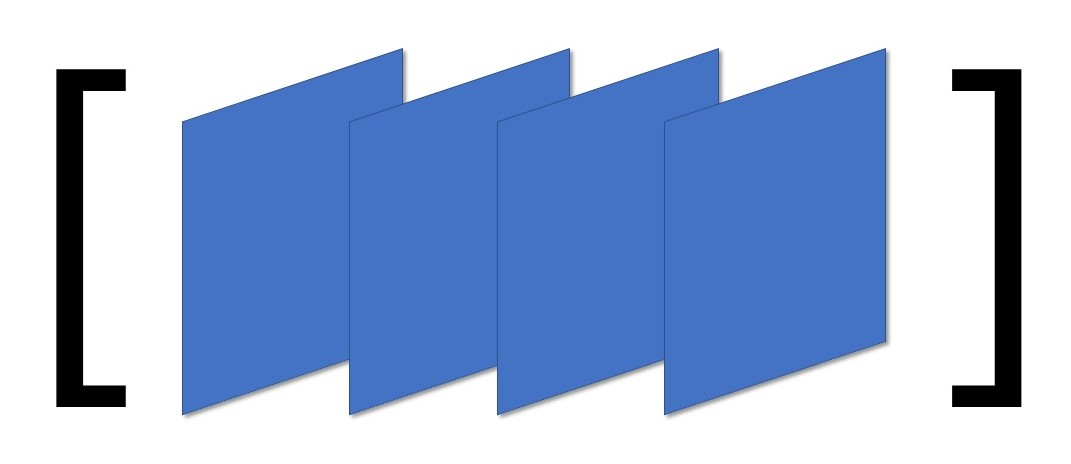

# Batch Size

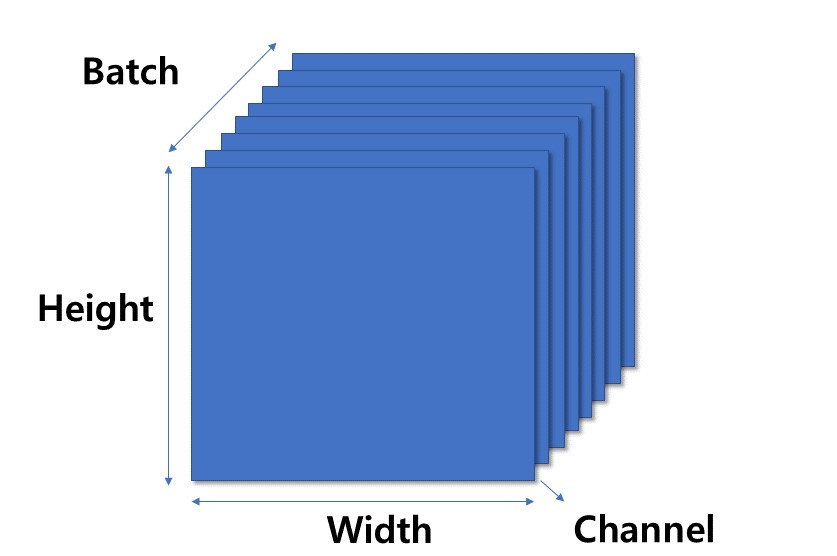

(batch_size, height, width, channel) - tensorflow

In [31]:
def make_batch(batch_paths):
    batch_images = []
    
    for path in batch_paths:
        image = read_image(path)
        batch_images.append(image)
        
    return tf.convert_to_tensor(batch_images)

In [33]:
batch_images = make_batch(data_paths[:8])

In [34]:
batch_images.shape

TensorShape([8, 32, 32, 3])

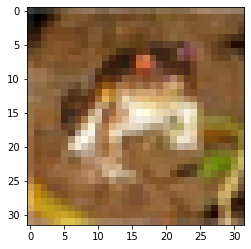

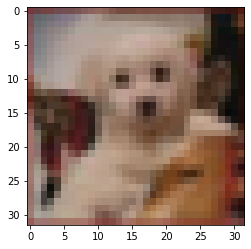

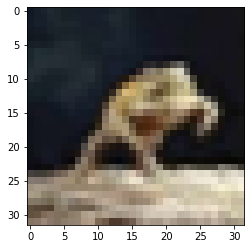

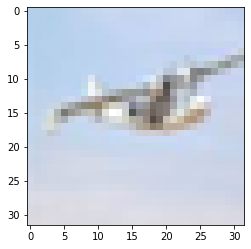

In [35]:
batch_size = 16

for step in range(4):
    batch_images = make_batch(data_paths[step * batch_size:(step + 1) * batch_size])
    
    plt.imshow(batch_images[0])
    plt.show()